In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import os
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\ThinkPad\Downloads\vacinados.csv', sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3407298 entries, 0 to 3407297
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   cpf              object 
 1   nome             object 
 2   sexo             object 
 3   grupo            object 
 4   vacina           object 
 5   lote             object 
 6   dose             float64
 7   data_vacinacao   object 
 8   local_vacinacao  object 
dtypes: float64(1), object(8)
memory usage: 234.0+ MB


In [3]:
# Selecionando amostra de 1500 linhas
vac = df.sample(n=1500, random_state=2)

In [4]:
# Limpando valores nulos e únicos
vac.isnull().sum()
vac.nunique()

cpf                1487
nome               1496
sexo                  3
grupo                21
vacina                6
lote                127
dose                  4
data_vacinacao      364
local_vacinacao      75
dtype: int64

In [5]:
# Transformando coluna com o mês de vacinação em datetime

vac['data_vacinacao'] = pd.to_datetime(vac['data_vacinacao'])

In [17]:
# Feature Statistics

feat_local = vac['local_vacinacao'].mode()
feat_vacina = vac['vacina'].mode()

print('Local de Vacinação mais comum:', feat_local)
print('Vacina mais comum: ', feat_vacina)




vac.sort_values(by='data_vacinacao', inplace=True)
doses = vac.groupby('data_vacinacao').count().cumsum()

dose1 = vac.loc[vac['dose'] == 1]
dose1 = dose1.groupby('data_vacinacao').count().cumsum()

dose2 = vac.loc[vac['dose'] == 2]
dose2 = dose2.groupby('data_vacinacao').count().cumsum()



Local de Vacinação mais comum: 0    DRIVE THRU GERALDÃO
Name: local_vacinacao, dtype: object
Vacina mais comum:  0    3 - COMIRNATY (PFIZER)
Name: vacina, dtype: object


Text(0, 0.5, 'Mil Doses')

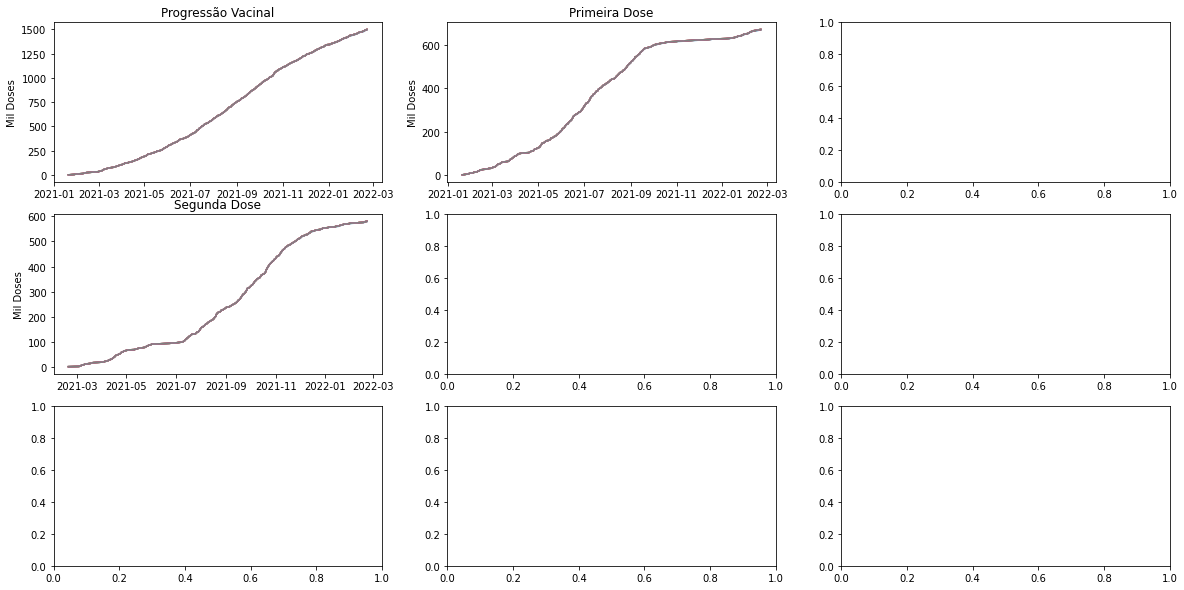

In [7]:
fig, axs = plt.subplots(3, 3, figsize = (20,10))
axs[0, 0].plot(doses)
axs[0, 0].set_title('Progressão Vacinal')
axs[0, 0].set_ylabel('Mil Doses')

axs[0, 1].plot(dose1)
axs[0, 1].set_title('Primeira Dose')
axs[0, 1].set_ylabel('Mil Doses')

axs[1, 0].plot(dose2)
axs[1, 0].set_title('Segunda Dose')
axs[1, 0].set_ylabel('Mil Doses')

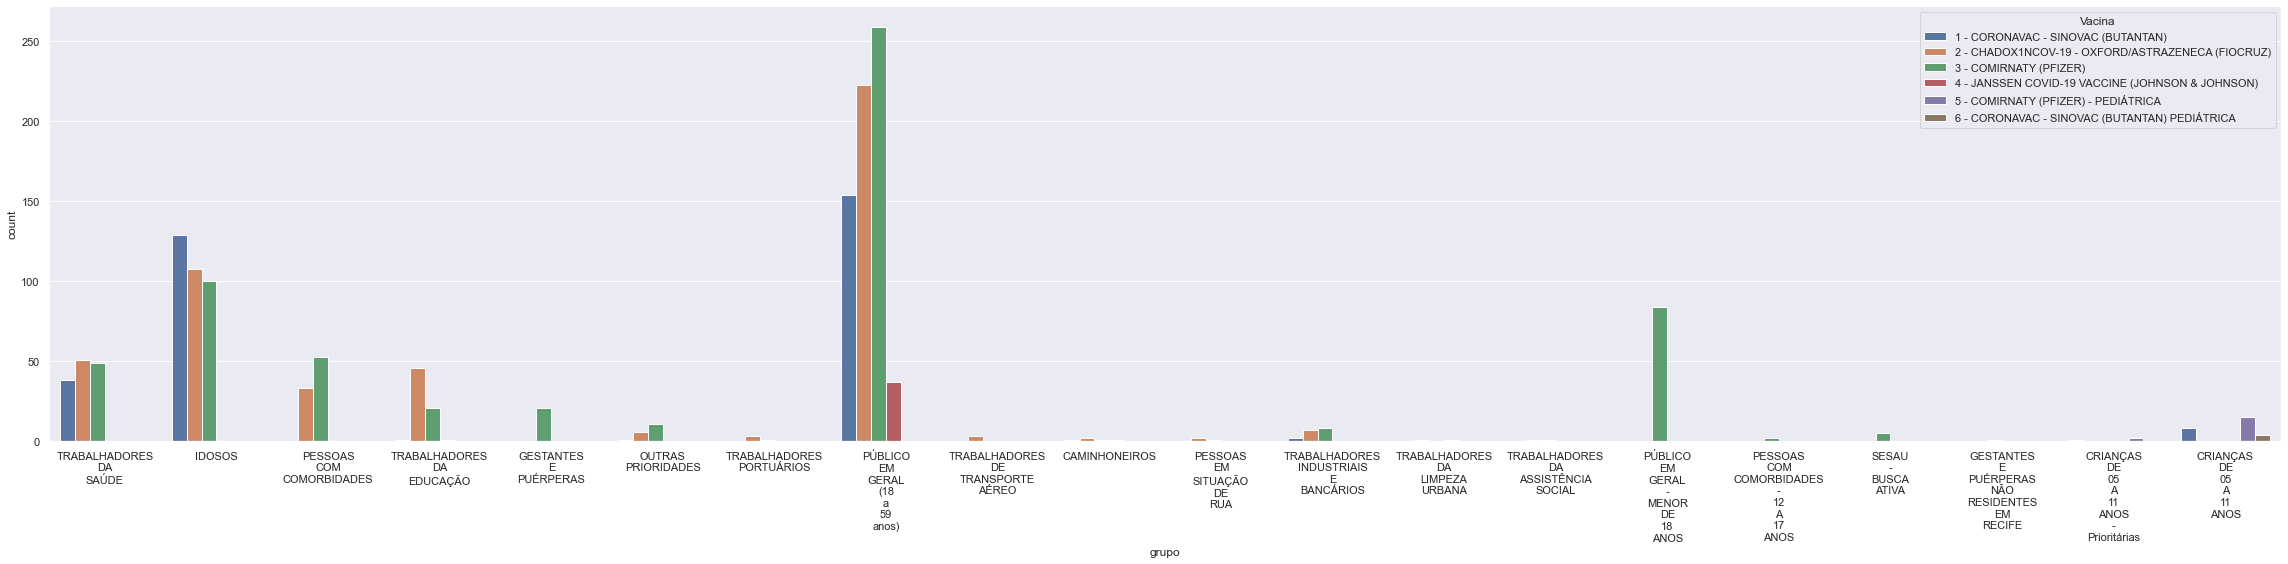

In [8]:
# vac.sort_values(by='data_vacinacao', inplace=True)
# data = vac.groupby('data_vacinacao').count().cumsum()
# plt.figure(figsize=(12,9))
# plt.plot(data)
# plt.title('Progressão vacinal ao longo dos meses', fontsize=18)
# plt.xlabel('Meses', fontsize=12)
# plt.ylabel('Mil doses', fontsize=12)
# plt.xticks(rotation=45)
# plt.show()

# Data Vis
# 1. Progressão temporal de indivíduos vacinados;
vac['grupo'] = vac['grupo'].str.replace(' PÚBLICO EM GERAL - MENOR DE 18 ANOS', 'PÚBLICO EM GERAL - MENOR DE 18 ANOS')
vac['grupo'] = vac['grupo'].str.replace(' ', '\n')
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(40,8)}, font_scale=1)
ax = sns.countplot(x='grupo', hue='vacina', data=vac)
plt.legend(loc='upper right', title='Vacina')

# 2. Progressão temporal de indivíduos vacinados por grupo;


# 3. Locais de vacinação mais frequentes;


# 4. Grupos de vacinação mais frequentes;


# Código vai aqui

In [9]:
# 1 Existe alguma correlação do tipo de vacina vs. o grupo do individuo? (por ex: Moradores de rua tomaram um tipo específico de vacina?)

# Código vai aqui

In [10]:
# 2 Existe alguma tipo de relação do tipo de vacina vs. quando ela foi administrada? (por ex: as vacinas administradas mudaram ao longo do tempo?)

# Código vai aqui

In [11]:
# 3 Existe alguma relação da progressão temporal da vacinação com o sexo? (por ex: mulheres se vacinam antes que os homens?)

# Código vai aqui